In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [26]:
plt.rcParams.update({
    "text.usetex": True,                # Use LaTeX for text
    "font.family": "serif",             # Use 'serif' font
    "font.serif": ["Computer Modern"],  # LaTeX default font
    "font.size": 11,                    # General font size
    "axes.labelsize": 11,               # Font size for labels
    "legend.fontsize": 11,              # Font size for legend
    "xtick.labelsize": 9,              # Font size for x-axis
    "ytick.labelsize": 9               # Font size for y-axis
})  

In [27]:
cf_combine = pd.read_csv('../Data/cf_combine_7923.csv',
                         index_col=0,
                         parse_dates=True).dropna()

In [28]:
cf_wind = cf_combine[['onshorewind_atlite', 'onshorewind_c3se_gridded', 'onshorewind_c3se_national']]
cf_pv = cf_combine[['pv_atlite', 'pv_c3se_gridded', 'pv_c3se_national']]


# Plot

In [29]:
color_models = ['#B03024', '#348ABD', '#988ED5']
label_name = ['ATL', 'C3S GRD', 'C3S NAT']

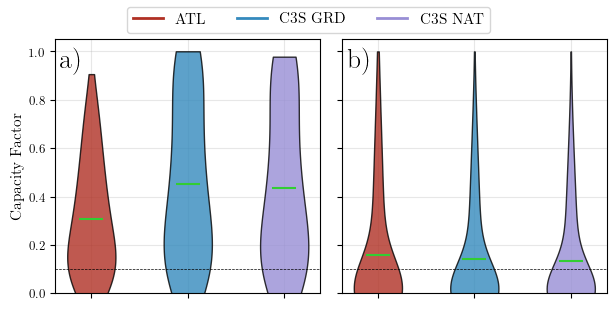

In [31]:
cm = 1 / 2.54
fig, ax = plt.subplots(1, 2, figsize=(16*cm, 8*cm), sharey=True)

for i in range(2):
    ax[i].set_xticks(range(1, len(label_name) + 1))
    ax[i].set_xticklabels([], rotation=20)
    ax[i].set_ylim(0, 1.05)
    ax[i].grid(True, alpha=0.3, zorder = 0)

# Violin plots
violins_wind = ax[0].violinplot(cf_wind,
                                showmeans=True,
                                showmedians=False,
                                showextrema=False,
                                bw_method=0.5)
violins_pv = ax[1].violinplot(cf_pv,
                              showmeans=True,
                              showmedians=False,
                              showextrema=False,
                              bw_method=0.5)

ax[0].axhline(0.1, color='k', linestyle='--', lw=0.5, zorder = 3)
ax[1].axhline(0.1, color='k', linestyle='--', lw=0.5, zorder = 3)


# Customize colors
for i, (ele_wind, ele_pv) in enumerate(zip(violins_wind['bodies'], violins_pv['bodies'])):
    ele_wind.set_facecolor(color_models[i % len(color_models)])
    ele_wind.set_edgecolor('black')
    ele_wind.set_alpha(0.8)
    ele_wind.set_zorder(2)
    ele_pv.set_facecolor(color_models[i % len(color_models)])
    ele_pv.set_edgecolor('black')
    ele_pv.set_alpha(0.8)
    ele_pv.set_zorder(2)

for partname in ('cmeans',):
    violins_wind[partname].set_color('limegreen')
    violins_pv[partname].set_color('limegreen')
    violins_wind[partname].set_linewidth(1.5)
    violins_pv[partname].set_linewidth(1.5)



# Labels
ax[0].text(0.02, 0.97, 'a)', fontsize=20, ha='left', va='top', transform=ax[0].transAxes)
ax[1].text(0.02, 0.97, 'b)', fontsize=20, ha='left', va='top', transform=ax[1].transAxes)
ax[0].set_ylabel("Capacity Factor")


# Legend
handles = [mlines.Line2D([], [], color=color_models[i], lw=2, label=label_name[i]) for i in range(len(color_models))]
fig.legend(handles=handles,
           loc='upper center',
           ncol=4,
           markerscale=2,
           fontsize=11)

# Adjust layout
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.savefig('violin_plots_analysis.pdf', bbox_inches='tight')